In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('data/nasa.csv')
df.head()

,Nome Item,Total Massa (Kg),Total Volume (m³),Wast Item,Key Materials,% Key Materials,Approx. Misture Content (%),% of item by Mass,% of item by Volume,Exemple Commercial Equivalent
0,Foam Packaging,1000,10,Zotek F30,Zotec F30,100%,~0%,100%,100%,Zotek F30
1,EVA Waste,100,1,Cargo Transfer Bags (CTB),Nomex,92%,~0%,100%,100%,Magrid NOM10 Nomex White Hood
2,EVA Waste,100,1,Cargo Transfer Bags (CTB),Nylon,3%,~0%,100%,100%,Magrid NOM10 Nomex White Hood
3,EVA Waste,100,1,Cargo Transfer Bags (CTB),Polyester,2%,~0%,100%,100%,Magrid NOM10 Nomex White Hood
4,Fabrics,1000,10,Clothing,Cotton/celulose,56%,4%,77%,59%,Hanes Men's Undershift


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Nome Item                      27 non-null     object
 1   Total Massa (Kg)               27 non-null     int64 
 2   Total Volume (m³)              27 non-null     int64 
 3   Wast Item                      27 non-null     object
 4   Key Materials                  27 non-null     object
 5   % Key Materials                27 non-null     object
 6   Approx. Misture Content (%)    27 non-null     object
 7   % of item by Mass              27 non-null     object
 8   % of item by Volume            27 non-null     object
 9   Exemple Commercial Equivalent  27 non-null     object
dtypes: int64(2), object(8)
memory usage: 2.2+ KB


In [42]:
df.describe()

,Total Massa (Kg),Total Volume (m³)
count,27.000000,27.00000
mean,700.000000,7.00000
std,432.346015,4.32346
min,100.000000,1.00000
25%,100.000000,1.00000
50%,1000.000000,10.00000
75%,1000.000000,10.00000
max,1000.000000,10.00000


In [43]:
df.isnull().sum()

,0
Nome Item,0
Total Massa (Kg),0
Total Volume (m³),0
Wast Item,0
Key Materials,0
% Key Materials,0
Approx. Misture Content (%),0
% of item by Mass,0
% of item by Volume,0
Exemple Commercial Equivalent,0


In [44]:
df.head()

,Nome Item,Total Massa (Kg),Total Volume (m³),Wast Item,Key Materials,% Key Materials,Approx. Misture Content (%),% of item by Mass,% of item by Volume,Exemple Commercial Equivalent
0,Foam Packaging,1000,10,Zotek F30,Zotec F30,100%,~0%,100%,100%,Zotek F30
1,EVA Waste,100,1,Cargo Transfer Bags (CTB),Nomex,92%,~0%,100%,100%,Magrid NOM10 Nomex White Hood
2,EVA Waste,100,1,Cargo Transfer Bags (CTB),Nylon,3%,~0%,100%,100%,Magrid NOM10 Nomex White Hood
3,EVA Waste,100,1,Cargo Transfer Bags (CTB),Polyester,2%,~0%,100%,100%,Magrid NOM10 Nomex White Hood
4,Fabrics,1000,10,Clothing,Cotton/celulose,56%,4%,77%,59%,Hanes Men's Undershift


In [45]:
df.columns

Index(['Nome Item', 'Total Massa (Kg)', 'Total Volume (m³)', 'Wast Item',
       'Key Materials', '% Key Materials', 'Approx. Misture Content (%)',
       '% of item by Mass', '% of item by Volume',
       'Exemple Commercial Equivalent'],
      dtype='object')

# Tratamento

In [46]:
df = df.rename(columns={
    'Nome Item': 'Item_Name',
    'Total Massa (Kg)': 'Total_Mass_Kg',
    'Total Volume (m³)': 'Total_Volume_m3',
    'Wast Item': 'Waste_Item',
    'Key Materials': 'Key_Materials',
    '% Key Materials': 'Percent_Key_Materials',
    'Approx. Misture Content (%)': 'Approx_Moisture_Content_Percent',
    '% of item by Mass': 'Percent_of_item_by_Mass',
    '% of item by Volume': 'Percent_of_item_by_Volume',
    'Exemple Commercial Equivalent': 'Commercial_Equivalent'
})

In [47]:
percent_cols = [
    'Percent_Key_Materials',
    'Approx_Moisture_Content_Percent',
    'Percent_of_item_by_Mass',
    'Percent_of_item_by_Volume'
]

for col in percent_cols:
    # Convertendo para float (decimal)
    df[col] = df[col].astype(str).str.replace('~', '', regex=False) \
                                   .str.replace('%', '', regex=False) \
                                   .str.replace(',', '.', regex=False)

    df[col] = pd.to_numeric(df[col], errors='coerce') / 100

In [48]:
df['Density_Kg_m3'] = df['Total_Mass_Kg'] / df['Total_Volume_m3']
df['Mass_Contribution_Kg'] = df['Total_Mass_Kg'] * df['Percent_Key_Materials']
df['Moisture_Mass_Kg'] = df['Total_Mass_Kg'] * df['Approx_Moisture_Content_Percent']



In [49]:
df['Mass_Contribution_Kg'] = df['Mass_Contribution_Kg'].fillna(0)
df['Moisture_Mass_Kg'] = df['Moisture_Mass_Kg'].fillna(0)

In [50]:
df

,Item_Name,Total_Mass_Kg,Total_Volume_m3,Waste_Item,Key_Materials,Percent_Key_Materials,Approx_Moisture_Content_Percent,Percent_of_item_by_Mass,Percent_of_item_by_Volume,Commercial_Equivalent,Density_Kg_m3,Mass_Contribution_Kg,Moisture_Mass_Kg
0,Foam Packaging,1000,10,Zotek F30,Zotec F30,1.00,0.00,1.00,1.00,Zotek F30,100.0,1000.0,0.0
1,EVA Waste,100,1,Cargo Transfer Bags (CTB),Nomex,0.92,0.00,1.00,1.00,Magrid NOM10 Nomex White Hood,100.0,92.0,0.0
2,EVA Waste,100,1,Cargo Transfer Bags (CTB),Nylon,0.03,0.00,1.00,1.00,Magrid NOM10 Nomex White Hood,100.0,3.0,0.0
3,EVA Waste,100,1,Cargo Transfer Bags (CTB),Polyester,0.02,0.00,1.00,1.00,Magrid NOM10 Nomex White Hood,100.0,2.0,0.0
4,Fabrics,1000,10,Clothing,Cotton/celulose,0.56,0.04,0.77,0.59,Hanes Men's Undershift,100.0,560.0,40.0
5,Fabrics,1000,10,Clothing,Nylon,0.06,0.04,0.77,0.59,Hanes Men's Undershift,100.0,60.0,40.0
6,Fabrics,1000,10,Clothing,Polyester,0.38,0.04,0.77,0.59,Hanes Men's Undershift,100.0,380.0,40.0
7,Fabrics,1000,10,Towels/ Wash Clothis,Cotton/cellulose,1.00,0.05,0.21,0.39,R&R Textile Wash Cloth,100.0,1000.0,50.0
8,Fabrics,1000,10,CleaningWipes,Cotton/cellulose,1.00,0.69,0.02,0.02,Virox PreEmpt Wipes,100.0,1000.0,690.0
9,Food Packaging,1000,10,Overwrap,Polyester,0.13,0.00,0.29,0.29,Glenroy White Ready Seal 225,100.0,130.0,0.0


In [51]:
# Dados agrupados pelo Nome do Item e calcular as massas somadas
mass_summary = df.groupby('Item_Name').agg({
    'Total_Mass_Kg': 'sum',
    'Moisture_Mass_Kg': 'sum'
}).reset_index().sort_values(by='Total_Mass_Kg', ascending=False)



In [52]:
# Total de Massa (Kg) por Tipo de Item
fig_mass = px.bar(
    mass_summary,
    x='Total_Mass_Kg',
    y='Item_Name',
    orientation='h',
    title='1. Distribuição da Massa Total (Kg) por Tipo de Item',
    color='Total_Mass_Kg',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig_mass.update_layout(yaxis={'categoryorder':'total ascending'})
fig_mass.show()

In [53]:
# Massa Total de Umidade (Kg) por Tipo de Item
fig_moisture = px.bar(
    mass_summary.sort_values(by='Moisture_Mass_Kg', ascending=False),
    x='Moisture_Mass_Kg',
    y='Item_Name',
    orientation='h',
    title='2. Massa Total de Umidade (Kg) por Tipo de Item',
    color='Moisture_Mass_Kg',
    color_continuous_scale=px.colors.sequential.Cividis
)
fig_moisture.update_layout(yaxis={'categoryorder':'total ascending'})
fig_moisture.show()

In [82]:
# Análise da Contribuição de Massa dos Materiais-Chave
material_mass_sum = df.groupby('Key_Materials')['Mass_Contribution_Kg'].sum().reset_index()
material_mass_sum = material_mass_sum.sort_values(by='Mass_Contribution_Kg', ascending=False).head(15) # Top 15 Materiais
fig_pie = px.pie(
    material_mass_sum,
    values='Mass_Contribution_Kg',
    names='Key_Materials',
    title='3. Distribuição dos Top 15 Materiais-Chave pela Contribuição de Massa (Kg)',
    hole=0.4
)
fig_pie.update_traces(textposition='inside', textinfo='percent+label', marker=dict(line=dict(color='#000000', width=1)))
fig_pie.show()


/tmp/ipython-input-1566110233.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




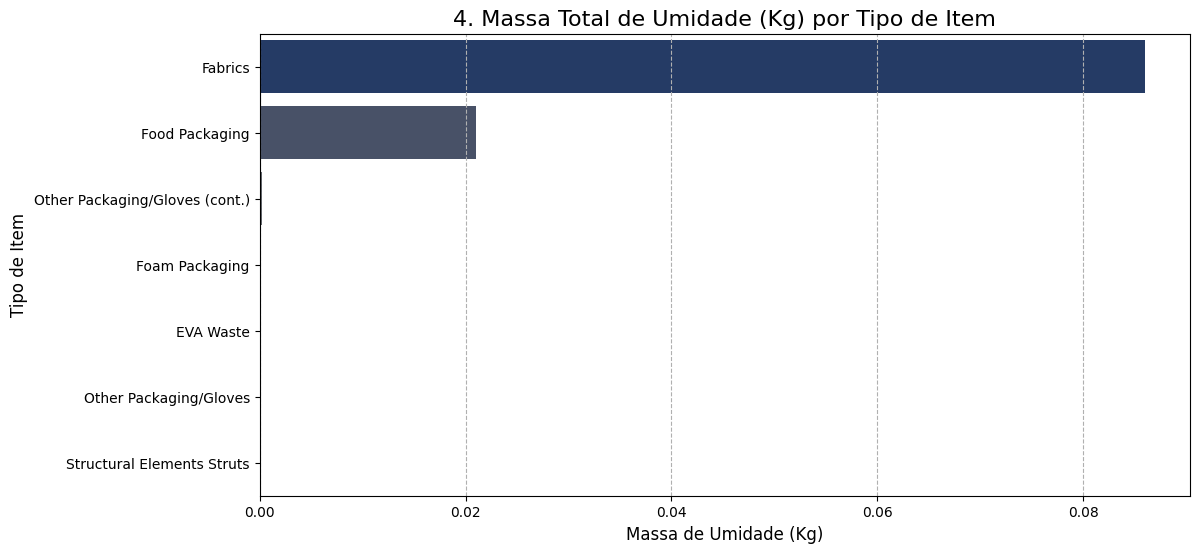

In [83]:
# Análise de Umidade (Moisture)
moisture_summary = df.groupby('Item_Name')['Moisture_Mass_Kg'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Moisture_Mass_Kg',
    y='Item_Name',
    data=moisture_summary.sort_values(by='Moisture_Mass_Kg', ascending=False),
    palette='cividis'
)
plt.title('4. Massa Total de Umidade (Kg) por Tipo de Item', fontsize=16)
plt.xlabel('Massa de Umidade (Kg)', fontsize=12)
plt.ylabel('Tipo de Item', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.show()

In [56]:
# Análise Hierárquica (Treemap)

df_hierarquia = df.groupby(['Item_Name', 'Key_Materials'])['Total_Mass_Kg'].sum().reset_index()

fig_treemap = px.treemap(
    df_hierarquia,
    path=['Item_Name', 'Key_Materials'],
    values='Total_Mass_Kg',
    color='Total_Mass_Kg',
    color_continuous_scale='plasma',
    title='5. Hierarquia da Massa Total: De Categoria Principal ao Material-Chave (Kg)'
)

fig_treemap.update_traces(
    textinfo='label+percent parent' # Mostra o nome e a % em relação ao item pai
)
fig_treemap.show()

In [89]:
fig_plotly_table = go.Figure(data=[go.Table(
    header=dict(values=list(df_treated.columns),
                fill_color='#424242',
                font=dict(color='white', size=12),
                align='left'),
    cells=dict(values=df_treated.transpose().values,
               fill_color='white',
               align='left'))
])

fig_plotly_table.show()

In [86]:
fig_scatter_purity = px.scatter(
    df,
    x='Total_Volume_m3',
    y='Percent_of_item_by_Mass',
    size='Total_Mass_Kg',
    color='Waste_Item',
    hover_data=['Item_Name', 'Key_Materials'],
    title='6. Volume vs. Pureza por Item de Resíduo',
    labels={'Total_Volume_m3': 'Volume Total (m³)', 'Percent_of_item_by_Mass': 'Percentual de Massa no Item Total (Pureza - Razão)'}
)

fig_scatter_purity.show()
